# Module 1

# *Online Dermatologists:* 📱 🌐 Diagnosing Skin Cancer through a Web Application 

1 in 3 cancer patients have a form of skin cancer, making it the most prevalent form of cancer in the world. In the US alone, over 9,000 patients are diagnosed on a daily basis. Skin cancer hits rural and impoverished communities especially hard, as without access to professional healthcare workers and equipment, many cases go undetected, and proper care can't be administerd in time. Let's try to help out by creating a web app, that anyone can access through a phone or laptop, to have those suspicious moles checked out with ML! 

**Question:** Would you be comfortable with an ML model screening you for skin cancer? What would be some Pros and Cons with using ML for skin cancer diagnosis?

In [ ]:
#

In this project, we will be be diagnosing skin lesion images for signs of skin cancer. To perform this task, we'll be working with an array of machine learning methods and models. We'll also be developing a web app to deploy our machine learning models! From there, we'll employ some unsupervised ML tecnhiques for data visualizations and perform skin cancer image segmentation in addition to just classification!

The general outline for this project is as follows:
*   Module 1: Exploring Skin Cancer data and developing basic ML models with Computer Vision
*   Module 2: Developing more advanced ML models and deploying ML to a web app
*   Module 3: Checking for bias in ML models performing skin cancer diagnosis
*   Module 4: Exploring more advanced ML methods for skin cancer diagosis and lesion segmentation

In this notebook we'll be:
*   Understanding our dataset
*   Performing data preprocessing
*   Learning how to manipulate images with OpenCV
*   Artificially increasing our dataset's size
*   Creating basic ML models with our dataset

# Understanding our Dataset

Our dataset contains over 10,000 skin lesion images that fall into one of seven classes. These classes are melanocytic nevus, melanoma, benign keratosis, basal cell carcionoma, actinic keratosis, dermatofibroma, and vascular lesions. 

*   Melanocytic Nevus is the medical term used to denote a mole that originates from the melanocytes in the skin. These are harmless artifacts found on the skin.

*   Melanoma is a very serious form of skin cancer that originates from melanocyctes, cells in skin that produce melanin.

*   Benign Keratoses or Seborrheic Keratoses are skin artifacts that are not cancerous but form due to aging.

*   Basal Cell Carcinoma is a common form of skin cancer that originates from the basal cells. These cells replace the skin cells that die off.

*   Actinic Keratoses (Bowen's Disease) are a form of skin lesions that originate due to old age and sun exposure. These lesions are considered to be "pre-cancerous" and can develop to be cancerous.

*   Dermatofibroma are harmless skin bumps that form due to an overgrowth of various skin cells.

*   Vascular lesions are skin artifiacts often referred to as birthmarks. These lesions appear due to clustering of blood vessels.

![alt text](https://workshop2018.isic-archive.com/images/task3.png)

Our images are sourced from the HAM10000 dataset which is publically available. Each image image contains RGB data and is of the pixel dimensions 800 x 600. The images in the dataset are collected from a dermoscope, a tool that is used by dermatologists to image skin lesions. A dermoscope enhances images by providing maginification and adequate lighting. 

![alt text](https://upload.wikimedia.org/wikipedia/commons/e/e6/Dermatoscope1.JPG)

In [ ]:
#@title Run this to download data and prepare our environment! { display-mode: "form" }
from google.colab.output import eval_js

import time
start_time = time.time()

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.notebook import tqdm

import keras
from keras import backend as K
from tensorflow.keras.layers import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import random
from PIL import Image
import gdown

import argparse
import numpy as np
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
import struct
from google.colab.patches import cv2_imshow
from copy import deepcopy
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from keras.applications.mobilenet import MobileNet

!pip install hypopt
from hypopt import GridSearch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

!pip install -U opencv-contrib-python
import cv2

!pip install tensorflowjs 
import tensorflowjs as tfjs

from google.colab import files

import requests, io, zipfile

# Prepare data

DATA_ROOT = '/content/data'
os.makedirs(DATA_ROOT, exist_ok=True)

'''
metadata_url = 'https://www.dropbox.com/s/hjmh4lhepynh3nr/metadata.csv?dl=1'
metadata_path = os.path.join(DATA_ROOT, 'metadata.csv')
requests.get(metadata_url)
gdown.download(metadata_url, metadata_path, True)

images_1 = 'https://drive.google.com/uc?id=1VAbEVMKZmKyh9tpe9iVZ_XpTPLpxitwt'
image_path_1 = os.path.join(DATA_ROOT, 'images_1.zip')
requests.get(images_1)
gdown.download(images_1, image_path_1, True)

images_2 = 'https://www.dropbox.com/s/h2f0hlgrm2689cm/images_2.zip?dl=1'
image_path_2 = os.path.join(DATA_ROOT, 'images_2.zip')
requests.get(images_2)
gdown.download(images_2, image_path_2, True)
'''

metadata_path = os.path.join(DATA_ROOT, 'metadata.csv')
image_path_1 = os.path.join(DATA_ROOT, 'images_1.zip')
image_path_2 = os.path.join(DATA_ROOT, 'images_2.zip')
images_rgb_path = os.path.join(DATA_ROOT, 'hmnist_8_8_RGB.csv')

!wget -O data/metadata.csv https://www.dropbox.com/s/hjmh4lhepynh3nr/metadata.csv?dl=1
!wget -O data/images_1.zip https://www.dropbox.com/s/tg6fryuhdvjpaaf/images_1.zip?dl=1
!wget -O data/images_2.zip https://www.dropbox.com/s/h2f0hlgrm2689cm/images_2.zip?dl=1
!wget -O data/hmnist_8_8_RGB.csv https://www.dropbox.com/s/mmyq9ngs0pe7lpb/hmnist_8_8_RGB.csv?dl=1

!pip install patool
import patoolib

import os.path
from os import path

if path.exists(os.path.join(DATA_ROOT, 'images_1')) == False:
  patoolib.extract_archive(os.path.join(DATA_ROOT, 'images_1.zip'), outdir= os.path.join(DATA_ROOT, 'images_1') )

if path.exists(os.path.join(DATA_ROOT, 'images_2')) == False:
  patoolib.extract_archive(os.path.join(DATA_ROOT, 'images_2.zip'), outdir= os.path.join(DATA_ROOT, 'images_2') )

from distutils.dir_util import copy_tree

fromDirectory = os.path.join(DATA_ROOT, 'images_1')
toDirectory = os.path.join(DATA_ROOT, 'images_all')

copy_tree(fromDirectory, toDirectory)

fromDirectory = os.path.join(DATA_ROOT, 'images_2')
toDirectory = os.path.join(DATA_ROOT, 'images_all')

copy_tree(fromDirectory, toDirectory)

print("Downloaded Data")

     |████████████████████████████████| 57.4MB 52kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 112kB 14.6MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0
--2021-05-29 16:14:46--  https://www.dropbox.com/s/hjmh4lhepynh3nr/metadata.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/hjmh4lhepynh3nr/metadata.csv [following]
--2021-05-29 16:14:46--  https://www.dropbox.com/s/dl/hjmh4lhepynh3nr/metadata.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc39b5edf42fdabd60398a5647a4.dl.dropboxusercontent.com/cd/0/get/BPZq-bbY-q3N_ETn1YnAmThtJgHjH67khct2b66ky-lh1Fnwdh9DicPF35yVY9D7j4KCWU3w8giap1CbzuswfmNiWUAERjubWESO4CUF

# Preparing Our Dataset for Analysis

In [ ]:
IMG_WIDTH = 100
IMG_HEIGHT = 75

We'll start off by separating our dataset into the `X` and `y` variables. Remember, `X` represents our input data (images), and `y` represents our data's labels (skin lesion classification). Each image is scaled down to be 100 px by 75 px to reduce the memory footprint. We'll also create a variable `X_gray`, that is the grayscale equivalent of our `X` variable. 

**Question:** Why might we want to create a grayscale version of our skin cancer lesion images?

In [ ]:
# Your Response Here

One reason for performing these grayscale transformations could be to reduce bias in a classifier. This could prevent the ML model from becoming dependent on the color of the skin, as opposed to the features present in the actual skin cancer lesion. Another reason could lie with the need to reduce the dimensionality of our dataset for our simple ML classifiers we'll train later on. The less complex the data is for training, the less likely our models is to overfit on the data. By performing this grayscale operation, we're reducing our RGB values for each pixel into one grayscale value from 0 to 255.

As there are over 10,000 images, this code segment may take a few minutes to run.

In [ ]:
X = []
X_gray = []

y = []

In [ ]:
#@title Run this to initialize our X, X_gray, and y variables { display-mode: "form" }
metadata = pd.read_csv(metadata_path)
metadata['category'] = metadata['dx'].replace({'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6,})


for i in tqdm(range(len(metadata))):
  image_meta = metadata.iloc[i]
  path = os.path.join(toDirectory, image_meta['image_id'] + '.jpg')
  img = cv2.imread(path,cv2.IMREAD_COLOR)
  img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
  
  img_g = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  X_gray.append(img_g)

  X.append(img)
  y.append(image_meta['category'])

X_gray = np.array(X_gray)
X = np.array(X)
y = np.array(y)

Let's take a look at an example of what our data looks like! Explore the dataset for different indicies in our `X` variable!

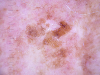

In [ ]:
cv2_imshow(X[0])

Let's take a look at the shape of our updated `X`, `X_gray`, and `y` variables

In [ ]:
# Your Code Here 10015 - Total Image, 75- Width, 100 - Height, 3 - RGB Value
X.shape, X_gray.shape, y.shape

((10015, 75, 100, 3), (10015, 75, 100), (10015,))

It looks like we've got a total of 10,015 images in our dataset. Plotting a graph of the distribution of labels found in the dataset can help us determine if we need to balance the data.

[327, 514, 1099, 115, 1113, 6705, 142]


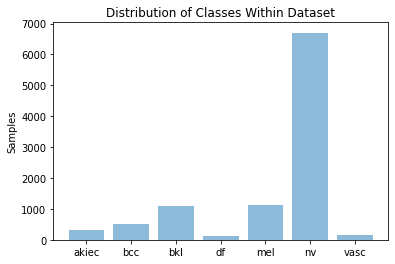

In [ ]:
#@title Run this to plot the distribution of our dataset { display-mode: "form" }
objects = ('akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc')
y_pos = np.arange(len(objects))
occurances = []

for obj in objects:
  occurances.append(np.count_nonzero(obj == metadata['dx']))

print(occurances)

plt.bar(y_pos, occurances, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Samples')
plt.title('Distribution of Classes Within Dataset')

plt.show()

This bar chart clearly informs us that our dataset is very unbalanced. There are far more nevi samples than there are samples of any other class. 

**Question:** Why might accuracy be a bad metric for measuring our model's performance with an unbalanced dataset?

In [ ]:
#Accuarcy is bad because if you call NV all the time, it would be 6.5/10 or 65% accurate due to amount of samples - 6.5k over total which is 10k

For the sake of reducing execution and training time, we'll be cutting down the size of our dataset. But if you would like to observe the full performance of our model and see the complete extent of our visualizations, you can comment out the following lines and re-run the notebook. However, note that some code blocks will take much longer to run.

Decide between which of the following methods you would like to use to reduce your dataset size. Only run one of the two code blocks. The first option reduces the dataset size far more than the second option. Specify which option you would like to proceed with by setting the value for the variable `option`.

In [ ]:
sample_cap = 142
option = 1

In [ ]:
#@title Option 1: Run this to reduce dataset size. This method caps each class at *sample_cap* samples. { display-mode: "form" }
if (option == 1):
  objects = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
  class_totals = [0,0,0,0,0,0,0]
  iter_samples = [0,0,0,0,0,0,0]
  indicies = []

  for i in range(len(X)):
    class_totals[y[i]] += 1

  print("Initial Class Samples")
  print(class_totals)

  for i in range(len(X)):
    if iter_samples[y[i]] != sample_cap:
      indicies.append(i)
      iter_samples[y[i]] += 1

  X = X[indicies]
  X_gray = X_gray[indicies]

  y = y[indicies]

  class_totals = [0,0,0,0,0,0,0]

  for i in range(len(X)):
    class_totals[y[i]] += 1

  print("Modified Class Samples")
  print(class_totals)
else:
  print("This option was not selected")

Initial Class Samples
[327, 514, 1099, 115, 1113, 6705, 142]
Modified Class Samples
[142, 142, 142, 115, 142, 142, 142]


In [ ]:
#@title Option 2: Run this to reduce dataset size. This method only reduces the number of *nv* samples to be the same amount as the number of samples found in the second most prevalent class. { display-mode: "form" }
if (option == 2):
  objects = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
  class_totals = [0,0,0,0,0,0,0]

  for i in range(len(X)):
    class_totals[y[i]] += 1

  print("Initial Class Samples")
  print(class_totals)

  largest_index = class_totals.index(max(class_totals))
  class_totals[largest_index] = 0

  second_largest_val = max(class_totals)

  indicies = []
  iter = 0
  for i in range(len(X)):
    if y[i] == largest_index:
      if iter != second_largest_val:
        indicies.append(i)
        iter += 1
      else:
        continue
    else:
      indicies.append(i)

  class_totals = [0,0,0,0,0,0,0]

  for i in range(len(X)):
    class_totals[y[i]] += 1

  print("Modified Class Samples")
  print(class_totals)

  X = X[indicies]
  X_gray = X_gray[indicies]

  y = y[indicies]
else:
  print("This option was not selected")

This option was not selected


By running the second code block above, our dataset is no longer imbalanced. This would mean that we could use accuracy as a metric for performance. However, throughout the rest of the notebooks, we'll explore performance metrics other than accuracy, in case some students have varying numbers of samples in their final datasets.

**Question:** Before we move on, let's think of some ways we can create an ML model that performs well. Would you want to modify the dataset? Would you want to tailor the ML model in any specific way?

In [ ]:
# Your Response Here

# OpenCV Image Manipulation

Having a large and rich dataset allows our model to be exposed to different types of images and in turn, perform better when given images to classify.

**Question:** What are some ways we might be able to gather more data? What would be some challenges?

In [ ]:
# Your Response Here

Consider profeessional images taken with proper medical equipment by a dermatologist. These images are more likely to be clearer and in focus, when compared with those taken by an amateur with a cell phone camera. However, as both types of images are likely to be sent to our ML model for classification, its important that we prepare our model for both situations.

One method of increasing our dataset's size is called *data augmentation*. Through data augmentation, we take existing images from our dataset, and duplicate a version of that image with an image transformation applied to it. This process can be repeated multiple times, and the dataset size can increase ten-fold or greater. Well, what does this mean in practice?

Let's explore this further with the example of this *Jaguar* sports car.

In [ ]:
#@title Run this to download our Jaguar car image! { display-mode: "form" }
jaguar_url = 'https://drive.google.com/uc?id=105rqCRSaET8znAZQJ0xrNAL-EwNAhLyY'
jaguar_path = os.path.join(DATA_ROOT, 'jaguar.jpg')
gdown.download(jaguar_url, jaguar_path, True)

'/content/data/jaguar.jpg'

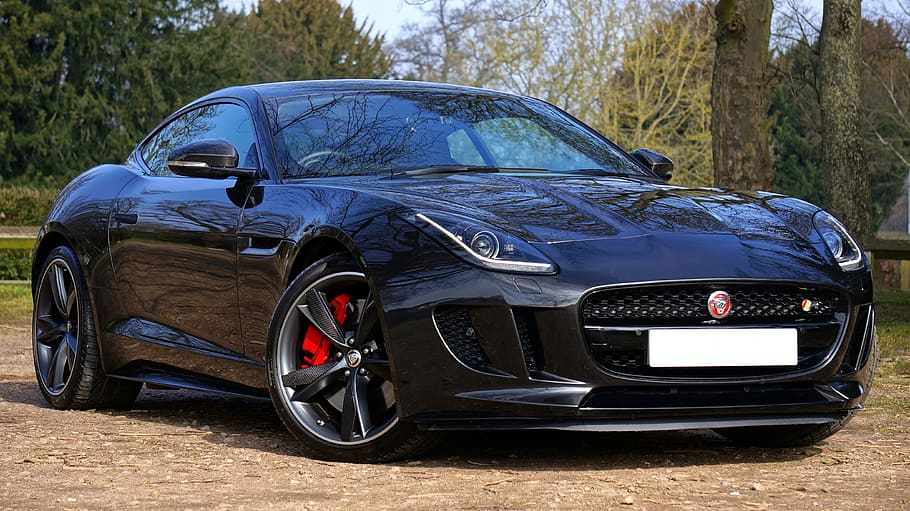

In [ ]:
jaguar = cv2.imread("data/jaguar.jpg")
cv2_imshow(jaguar)

This is a very crisp and detailed image. But what if in the future, after the model has been trained on numerous images like this, it's presented with an image of lower quality? What if the camera wasn't completely in focus? 

**Question:** How would the model perform? Could we mitigate this risk in anyway?

In [ ]:
# Your Response Here

One solution is to artificially generate these lower quality pictures ourselves. This way we could expose the model to lower quality images and prepare it in case it recieve similar images in the future.

To manipulate and edit images, we'll be exploring the use of the OpenCV library. OpenCV is a very powerful image processing library that has the capability to transform images in numerous ways.

**Question:** What are some image transformations we could use to create lower-quality images?

In [ ]:
# Your Response Here

Here are two functions in OpenCV: 



*   `cv2.resize(image,(new_width,new_height))` resizes an image.
*   `cv2.blur(image,(kernel_size,kernel_size))` blurs an image. The `kernel_size` argument indicates how wide and how high the window that smoothes the image is. The larger the kernel size, the more intense the blur. Try to come up with two ways in which we could decrease our image quality while still retaining the same image dimensions.

Also, you can use `cv2_imshow()` to view your images in Colab. If you are not in a Colab ntoebook environment, use `cv2.imshow()`.

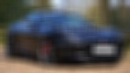

In [ ]:
# Your Response Here
jaguar = cv2.resize(jaguar, (130, 73))
jaguar = cv2.blur(jaguar, (10, 10))
cv2_imshow(jaguar)

Let's say that our classifier was comparing between Ferraris and Jaguars. and in most of the training data, the Ferraris were red and the Jaguars were black. 

**Question:** Now after training, if we presented the model with a red Jaguar, how would it perform? How would we be able to mitigate any problems that might arise?

Even further, what if images were being taken from the right hand side for most of the Jaguars , but the left hand for Ferraris? What might happen then, and what could we do to prevent any problems from arising?

In [ ]:
# Your Response Here

OpenCV uses the `BGR` coloring scheme as opposed to the traditional `RGB` coloring scheme for its images. This means that the first element of each pixel is the blue channel, the second element is the green channel, and the third element is the red channel. The function `cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)` converts an image to black and white, while the function `cv2.flip(image,i)` flips an image. When `i` is `0`,`1`,or `-1`, the image is flipped against the x-axis, y-axis, or against both axes respectively. Try creating some images that could reduce the likelihood of the aforementioned errors occuring:

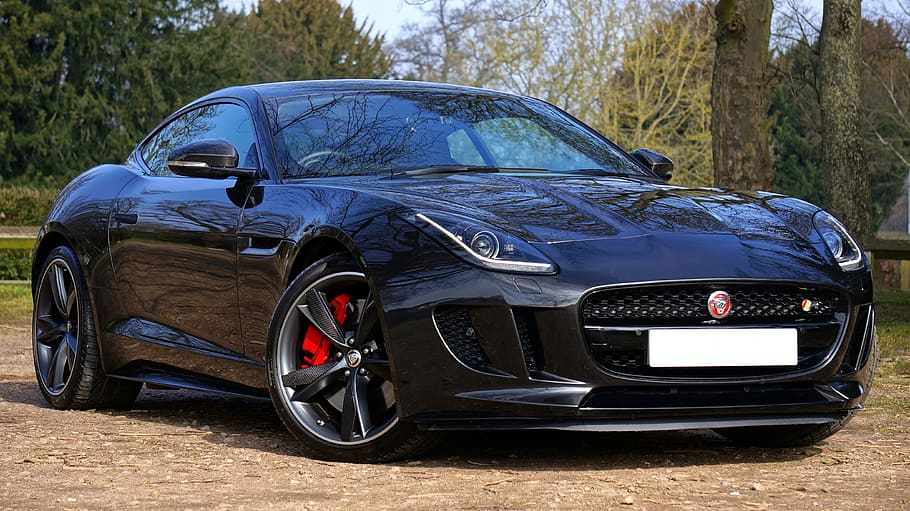

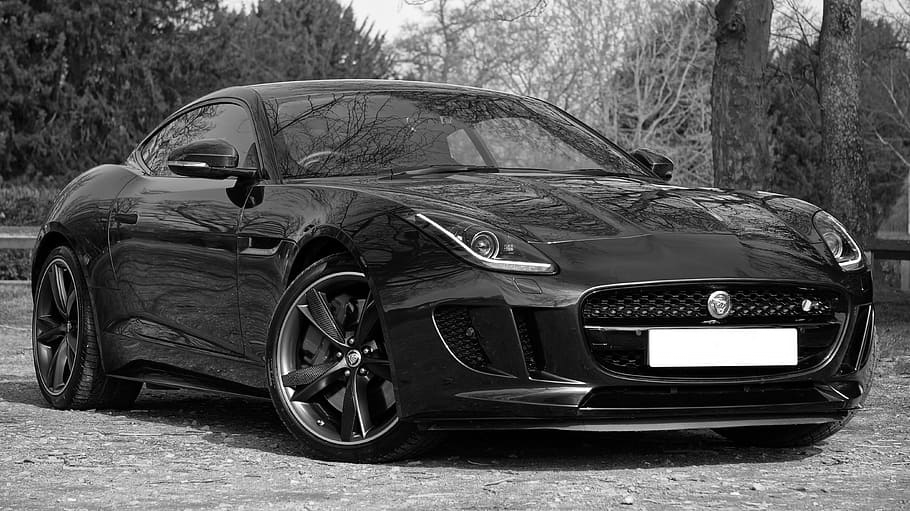

In [ ]:
# Your Code Here
jaguar = cv2.imread("data/jaguar.jpg")
cv2_imshow(jaguar)

jaguar = cv2.cvtColor(jaguar, cv2.COLOR_BGR2GRAY)
cv2_imshow(jaguar)

Another image transformation we can implement is a *zoom*. The code for this transformation is a little more involved - can you figure out what each step dose?

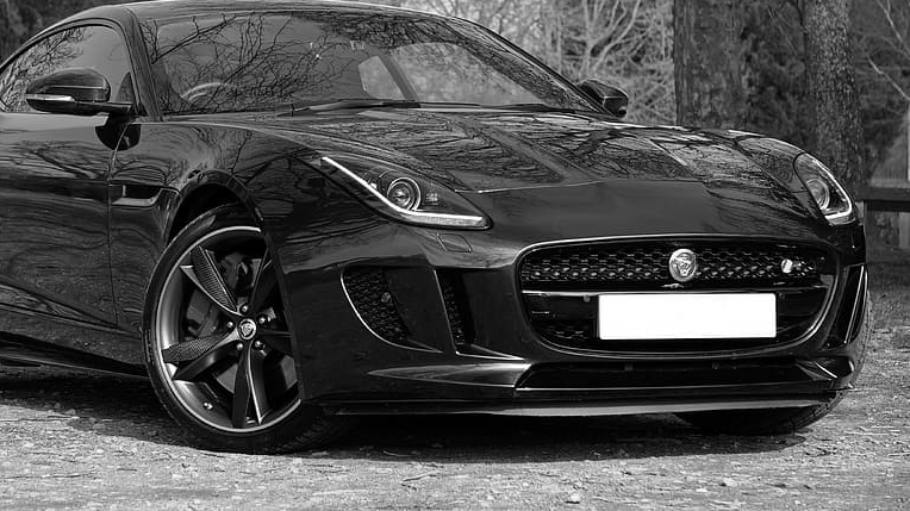

In [ ]:
#Zoom into our image
zoom = 0.33

centerX,centerY=int(jaguar.shape[0]/2),int(jaguar.shape[1]/2)
radiusX,radiusY= int((1-zoom)*jaguar.shape[0]*2),int((1-zoom)*jaguar.shape[1]*2)

minX,maxX=centerX-radiusX,centerX+radiusX
minY,maxY=centerY-radiusY,centerY+radiusY

cropped = jaguar[minX:maxX, minY:maxY]
zoom_img = cv2.resize(cropped, (jaguar.shape[1], jaguar.shape[0])) 
cv2_imshow(zoom_img)

Now, how would we make sure that our ML model isn't influenced by the background behind the car? If there were mountains, trees, or even other cars, is there any way we could make sure the model only pays attention to the Jaguar or Ferrari?

In [ ]:
# Your Response Here

Now, we've explored many different image operations we can perfom using OpenCV. Now, let's head back to our skin cancer image dataset, and apply what we've learned there!

# Data Augmentation

Although our dataset is very expansive with over 10,000 images, we can generate more samples so that our model is prepared to cope with a more varied dataset. Through data augmentation, we can perform random operations such as a flip, blur, or zoom on existing images, to create new image samples. It's important to note that these data augmentation procedures should only be applied to the training dataset.


**Question:** Which data augmentation transformations do you think would work well with our dataset? How might users' phone photos differ from the dataset of opthalmologists' photos?

In [ ]:
# Your Response Here

Let's first complete our test/train split for both our grayscale image data and our color image data.

In [ ]:
X_gray_train, X_gray_test, y_train, y_test = train_test_split(X_gray, y, test_size=0.4, random_state=101)

Let's also perform a test/train split for `X` and `y`: the color image data and the respective labels. We need to create `X_train, X_test, y_train, y_test`.

In [ ]:
# Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

We'll now iterate through all the images in the training slice of our dataset and create a duplicate with a random transformation, doubling our training dataset's size. In this code block, we'll randomly decide to flip the image across the y-axis or apply a 33% zoom. Refer to the previous section in the notebook for OpenCV functions and syntax.

In [ ]:
X_augmented = []
X_gray_augmented = []

y_augmented = []

for i in tqdm(range(len(X_train))):
 transform = random.randint(0,1)
 if (transform == 0):
   # Flip the image across the y-axis
   X_augmented.append(cv2.flip(X_train[i],1))
   X_gray_augmented.append(cv2.flip(X_gray_train[i],1))
   y_augmented.append(y_train[i])
 else:
   # Zoom 33% into the image
   zoom = 0.33

   centerX,centerY=int(IMG_HEIGHT/2),int(IMG_WIDTH/2)
   radiusX,radiusY= int((1-zoom)*IMG_HEIGHT*2),int((1-zoom)*IMG_WIDTH*2)

   minX,maxX=centerX-radiusX,centerX+radiusX
   minY,maxY=centerY-radiusY,centerY+radiusY

   cropped = (X_train[i])[minX:maxX, minY:maxY]
   new_img = cv2.resize(cropped, (IMG_WIDTH, IMG_HEIGHT))
   X_augmented.append(new_img)

   cropped = (X_gray_train[i])[minX:maxX, minY:maxY]
   new_img = cv2.resize(cropped, (IMG_WIDTH, IMG_HEIGHT))
   X_gray_augmented.append(new_img)

   y_augmented.append(y_train[i])

X_augmented = np.array(X_augmented)
X_gray_augmented = np.array(X_gray_augmented)

y_augmented = np.array(y_augmented)

X_train = np.vstack((X_train,X_augmented))
X_gray_train = np.vstack((X_gray_train,X_gray_augmented))

y_train = np.append(y_train,y_augmented)



In [ ]:
#@title Run this to Combine Augmented Data with Existing Samples { display-mode: "form" }
X_augmented = np.array(X_augmented)
X_gray_augmented = np.array(X_gray_augmented)

y_augmented = np.array(y_augmented)

X_train = np.vstack((X_train,X_augmented))
X_gray_train = np.vstack((X_gray_train,X_gray_augmented))

y_train = np.append(y_train,y_augmented)

Let's view the shape of our training variables after data augmentation.

In [ ]:
print(X_gray_train.shape)
print(X_train.shape)
print(y_train.shape)

(1740, 75, 100)
(1740, 75, 100, 3)
(1740,)


Try performing two additional image transformations with OpenCV for data augmentation!

In [ ]:
X_augmented = []
X_gray_augmented = []

y_augmented = []

for i in tqdm(range(len(X_train))):
  transform = random.randint(0,1)
  if (transform == 0):

    # Your Code Here

    X_augmented.append(X_train)
    X_gray_augmented.append(X_gray_train)
    y_augmented.append(y_train[i])
  else:

    # Your Code Here

    X_augmented.append(X_train)
    X_gray_augmented.append(X_gray_train)
    y_augmented.append(y_train[i])

In [ ]:
#@title Run this to Combine Augmented Data with Existing Samples { display-mode: "form" }
X_augmented = np.array(X_augmented)
X_gray_augmented = np.array(X_gray_augmented)

y_augmented = np.array(y_augmented)

X_train = np.vstack((X_train,X_augmented))
X_gray_train = np.vstack((X_gray_train,X_gray_augmented))

y_train = np.append(y_train,y_augmented)

NameError: ignored

# Creating Basic Machine Learning Models

Now that we've implemented data augmentation into our pipeline and artificially generated more samples for our dataset, lets test out various ML models. Which models do you think would work well for classifying our image data?



In [ ]:
# Your Response Here

Let's start off by creating a K Nearest Neighbors model.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

If you recall from earlier notebooks, Scikit-learn takes feature vectors as data samples (1D arrays). However, images have at least 2 dimensions. **Question:** How could we feed our images into Scikit-Learn?

In [ ]:
# Your Response Here

Let's perform an operation known as *image flattening* with our grayscale image data. In this operation, we reshape our images to be a one dimensional array of length 7500 instead of a matrix of dimensions (100 x 75). 

In [ ]:
X_g_train_flat = X_gray_train.reshape(X_gray_train.shape[0],-1)
X_g_test_flat = X_gray_test.reshape(X_gray_test.shape[0],-1)
print (X_g_train_flat.shape)
print (X_g_test_flat.shape)

Let's train our models on our flattened grayscale images! Once again, due to the size of our dataset, training may take a few minutes for each model.

In [ ]:
knn.fit(X_g_train_flat, y_train)

A common way to measure our model's performance uses the Receiver Operator Curve, which shows the relationship between our model's true positive and true negative rate. This metric is especially useful with our scenario, since - unlike accuracy - it doesn't depend on balanced classes in our dataset.

Here is an example of an ROC curve. It shows the true positive rate and true negative rate as we vary the postitive/negative threshold for a classifier. The AUC, or Area Under the Curve, is the metric we use. The greater the area - the closer to the top left the curve lies - the better the model. A model that guesses randomly would fit the 45 degree line.



![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.png)

We'll define a function called `model_stats()` that prints the models performance. Specifically, it will print the model's name, its accuracy, and its ROC AUC value. Before we create our function, there's one more thing to cover.

When we calculate the ROC AUC score, we have to compare the true test labels, `y_test`, against the predicted probabilities for each class for every sample. What does this mean? Let's take a look at an example! 

If a model was predicting class `0` in a classifier, the one hot repesentation of this would be `[1, 0, 0, 0]`. The probabilistic representation of this could be `[0.4, 0.2, 0.2, 0.2]`. All the probability values in the array add up to `1`. Each element of this array represents the probability of that specific class being predicted by the classifier. For example, the probability of class `0` being predicted is represented by the value in the zeroeth element of the array. In this case that would be `0.4`.

You can calculate these probability arrays using the `predict_proba()` function.

Now, fill in the code for model_stats. To calculate ROC AUC scores, you can use the `roc_auc_score()` function.

In [ ]:
def model_stats(name, y_test, y_pred, y_pred_proba):
  cm = confusion_matrix(y_test, y_pred)

  print(name)

  accuracy = accuracy_score(y_test, y_pred)
  print ("The accuracy of the model is " + str(round(accuracy,5)))

  multi_class = "ovo"
  roc_score = roc_auc_score(y_test, y_pred_proba, multi_class=multi_class)

  print ("The ROC AUC Score of the model is " + str(round(roc_score,5)))
  
  return cm

In our scenario, which do you think are worse? False positives, or false negatives?

In [ ]:
# Your Code Here
y_pred = knn.predict(X_g_test_flat)
y_proba = knn.predict_proba(X_g_test_flat)
knn_cm = model_stats('knn', y_test, y_pred, y_proba)

Let's run the function and observe the performance of our K Nearest Neighbors model. Remember that we have seven classes, so an accuracy that seems horribly low (like 50%) isn't as bad as it might appear!

In [ ]:
# Your Code Here

There seems to a big discrepancy between our accuracy and ROC AUC scores. Why is that? Let's take a look at some plots of the confusion matrices. Let's create a function called `plot_cm()`, that we will use to plot the confusion matrices.

In [ ]:
def plot_cm(name, cm):
  classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

  df_cm = pd.DataFrame(cm, index = [i for i in classes], columns = [i for i in classes])
  df_cm = df_cm.round(5)

  plt.figure(figsize = (12,8))
  sns.heatmap(df_cm, annot=True, fmt='g')
  plt.title(# Your Code Here)
  plt.xlabel(# Your Code Here)
  plt.ylabel(# Your Code Here)
  plt.show()

Let's run our new function for KNN classifier.

In [ ]:
# Your Code Here

It seems that while many nevi images were accurately classified, many other images of other classes were incorrectly classified as nevi. Due to our dataset being very imbalanced, the accuracy is misleading, as it is sensitive to imbalanced data. In addition, an AUC ROC score close to 0.5 indicates that the model is not capable of discriminating between the classes very well at all. 

**Question:** Why might these models have such low performance when it comes to performing classification on high resolution images? What classes do you think the model would easily confuse?

In [ ]:
# Your Response Here

Let's try modifying our KNN model's architecture and hyperparameters to increase our model's performance. We can use a library called *hypopt* to automate this process through a *grid search*. We'll automatically try out many possible hyperparameters for our machine learning algorithm to see which give the best performance.

Before we perform a grid search, we need to create an additional slice of our dataset. As of now, we have 60% of the data allocated for training, and 40% for testing. We'll now create a new slice of our dataset called the validation dataset. The validation dataset will be used for model testing during the grid search and will comprise 50% of our testing set, or 20% of the entire dataset.

Let's make create the new variables `X_gray_test, X_gray_val, y_g_test, y_g_val`. Also make sure to create `X_gray_val_flat` and `X_gray_test_flat`, our flattened arrays.

In [ ]:
# Your Code Here

In [ ]:
X_gray_test.shape

In the variable `param_grid` we can specify which parameters in our KNN Classifier we want to modify.

In [ ]:
param_grid = {
              'n_neighbors' :     [2, 3, 4, 5],
              'weights' :          ['uniform', 'distance'],
              'algorithm' :        ['ball_tree', 'kd_tree', 'brute']
             }

Let's initialize and fit our grid search optimizer. This can take a while!

In [ ]:
gs_knn = GridSearch(model=KNeighborsClassifier(),param_grid=param_grid)

gs_knn.fit(X_g_train_flat.astype(np.float32), y_train.astype(np.float32),
       X_gray_val_flat.astype(np.float32), y_g_val.astype(np.float32),verbose=1)

Now, the model will be trained with the best hyperparameters. Try evaluating its performance:

In [ ]:
# Your Code Here

Let's also plot the confusion matrix.

In [ ]:
# Your Code Here

Seems like the grid search didn't improve the model's performance. It could be that this ML model is unable to handle the dimensionality of our dataset.

Let's have a competiton! Try to create the best performing model in your group by modifying the grid search parameters. What was your best ROC AUC score?

In [ ]:
# Your Response Here

Try out some of these other ML models as well. Perhaps some of these would perform better?

In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

Great work completing the first notebook! In the next notebook, we'll create more complex ML models (which will hopfully work better!) and finally deploy our models to a web app.